# Action1	"智能供应链分析

数据集：SupplyChainDataset.csv，供应链采购数据

To Do：
对于欺诈订单进行预测，即Order Status='SUSPECTED_FRAUD'

对于迟交货订单进行预测，即Delivery Status= 'Late delivery'

对于销售额进行预测，即Sales字段

对于订货数量进行预测，即Order Item Quantity"			

"1、对欺诈订单进行预测（10points）

2、对迟交货订单进行预测（10points）

3、对销售额进行预测（10points）

4、对订货数量进行预测（10points）

5、对模型进行可解释性分析（10points）"

In [4]:
import pickle
with open('data.pkl','rb') as file:
    train_data=pickle.load(file)
train_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,order_month_year
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,2/3/2018 22:56,Standard Class,CallyHolloway,2018,1,2,22,2018-01
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,0,1/18/2018 12:27,Standard Class,IreneLuna,2018,1,5,12,2018-01
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,327.75,0,1/17/2018 12:06,Standard Class,GillianMaldonado,2018,1,5,12,2018-01
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,327.75,0,1/16/2018 11:45,Standard Class,TanaTate,2018,1,5,11,2018-01
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,327.75,0,1/15/2018 11:24,Standard Class,OrliHendricks,2018,1,5,11,2018-01


In [5]:
import numpy as np
train_data['fraud'] = np.where(train_data['Order Status']=='SUSPECTED_FRAUD',1,0)
train_data['fraud']
train_data['fraud'].sum()

4062

In [6]:
train_data['fraud'].sum()
train_data['late_delivery'] = np.where(train_data['Delivery Status']=='Late delivery',1,0)
train_data['late_delivery']
train_data['late_delivery'].sum()

98977

In [7]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Order Status', 'Product Image', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [8]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [9]:
for col in train_data.columns:
    if len(train_data[col].value_counts())<2:
        print(col)

Customer Email
Customer Password
Product Description
Product Status


In [10]:
print(len(train_data.columns))
train_data.drop(['Customer Email','Customer Password',\
                 'Product Description','Product Status',\
                'Product Image','Customer Lname','Customer Fname'],\
               axis=1,inplace=True)

print(len(train_data.columns))

61
54


In [11]:
train_data.drop(['Order Customer Id','Order Item Cardprod Id','Order Item Id','Sales per customer',\
                 'Order Item Total','Order Profit Per Order','Product Card Id',\
                 'Product Category Id', 'Product Price', 'Order Zipcode',\
                'shipping date (DateOrders)','Latitude','Longitude','Customer Street','order date (DateOrders)',\
                 'order_month_year','Order Status','Delivery Status',\
                'Late_delivery_risk'], axis=1, inplace=True)

In [12]:
categorical_cols = train_data.select_dtypes(include='object').columns
categorical_cols

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Region', 'Order State',
       'Product Name', 'Shipping Mode', 'Customer Full Name'],
      dtype='object')

In [13]:
train_data[categorical_cols]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,DEBIT,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,Smart watch,Standard Class,CallyHolloway
1,TRANSFER,Sporting Goods,Caguas,Puerto Rico,Consumer,PR,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,IreneLuna
2,CASH,Sporting Goods,San Jose,EE. UU.,Consumer,CA,Fitness,Pacific Asia,Bikaner,India,South Asia,Rajastán,Smart watch,Standard Class,GillianMaldonado
3,DEBIT,Sporting Goods,Los Angeles,EE. UU.,Home Office,CA,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,TanaTate
4,PAYMENT,Sporting Goods,Caguas,Puerto Rico,Corporate,PR,Fitness,Pacific Asia,Townsville,Australia,Oceania,Queensland,Smart watch,Standard Class,OrliHendricks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Fishing,Brooklyn,EE. UU.,Home Office,NY,Fan Shop,Pacific Asia,Shanghái,China,Eastern Asia,Shanghái,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MariaPeterson
180515,DEBIT,Fishing,Bakersfield,EE. UU.,Corporate,CA,Fan Shop,Pacific Asia,Hirakata,Japón,Eastern Asia,Osaka,Field & Stream Sportsman 16 Gun Fire Safe,Second Class,RonaldClark
180516,TRANSFER,Fishing,Bristol,EE. UU.,Corporate,CT,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,JohnSmith
180517,PAYMENT,Fishing,Caguas,Puerto Rico,Consumer,PR,Fan Shop,Pacific Asia,Adelaide,Australia,Oceania,Australia del Sur,Field & Stream Sportsman 16 Gun Fire Safe,Standard Class,MarySmith


In [14]:
train_data = train_data.dropna(subset=['Customer Full Name'])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat in categorical_cols:
    train_data[cat] = le.fit_transform(train_data[cat])
train_data[categorical_cols]

,Type,Category Name,Customer City,Customer Country,Customer Segment,Customer State,Department Name,Market,Order City,Order Country,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name
0,1,40,66,1,0,36,4,3,331,70,15,475,78,3,1875
1,3,40,66,1,0,36,4,3,391,69,13,841,78,3,5374
2,0,40,452,0,0,5,4,3,391,69,13,841,78,3,4426
3,1,40,285,0,2,5,4,3,3226,8,11,835,78,3,12922
4,2,40,66,1,1,36,4,3,3226,8,11,835,78,3,10632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,18,59,0,2,31,3,3,2922,31,7,913,24,3,8421
180515,1,18,26,0,1,5,3,3,1362,77,7,770,24,2,11672
180516,3,18,55,0,1,7,3,3,25,8,11,88,24,3,6296
180517,2,18,66,1,0,36,3,3,25,8,11,88,24,3,9379


In [16]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Product Name', 'Shipping Mode',
       'Customer Full Name', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'fraud', 'late_delivery'],
      dtype='object')

In [17]:
numerical_columns = train_data.columns.tolist()
for x in categorical_cols.tolist():
    numerical_columns.remove(x)

In [18]:
numerical_columns

['Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Category Id',
 'Customer Id',
 'Customer Zipcode',
 'Department Id',
 'Order Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'order_year',
 'order_month',
 'order_week_day',
 'order_hour',
 'fraud',
 'late_delivery']

In [19]:
x_fraud = train_data.loc[:, train_data.columns !='fraud']
y_fraud = train_data['fraud']
x_fraud

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,late_delivery
0,1,3,4,91.250000,73,40,66,1,20755,0,...,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,...,13,841,78,3,5374,2018,1,5,12,1
2,0,4,4,-247.779999,73,40,452,0,19491,0,...,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,...,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,...,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,...,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,...,7,770,24,2,11672,2016,1,5,1,1
180516,3,5,4,141.110001,45,18,55,0,291,1,...,11,88,24,3,6296,2016,1,4,21,1
180517,2,3,4,186.229996,45,18,66,1,2813,0,...,11,88,24,3,9379,2016,1,4,20,0


In [20]:
x_late = train_data.loc[:,train_data.columns!='late_delivery']
y_late = train_data['late_delivery']
x_late

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Region,Order State,Product Name,Shipping Mode,Customer Full Name,order_year,order_month,order_week_day,order_hour,fraud
0,1,3,4,91.250000,73,40,66,1,20755,0,...,15,475,78,3,1875,2018,1,2,22,0
1,3,5,4,-249.089996,73,40,66,1,19492,0,...,13,841,78,3,5374,2018,1,5,12,0
2,0,4,4,-247.779999,73,40,452,0,19491,0,...,13,841,78,3,4426,2018,1,5,12,0
3,1,3,4,22.860001,73,40,285,0,19490,2,...,11,835,78,3,12922,2018,1,5,11,0
4,2,2,4,134.210007,73,40,66,1,19489,1,...,11,835,78,3,10632,2018,1,5,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,0,4,4,40.000000,45,18,59,0,1005,2,...,7,913,24,3,8421,2016,1,5,3,0
180515,1,3,2,-613.770019,45,18,26,0,9141,1,...,7,770,24,2,11672,2016,1,5,1,0
180516,3,5,4,141.110001,45,18,55,0,291,1,...,11,88,24,3,6296,2016,1,4,21,0
180517,2,3,4,186.229996,45,18,66,1,2813,0,...,11,88,24,3,9379,2016,1,4,20,0


In [21]:
from sklearn.model_selection import train_test_split
x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test = train_test_split(x_fraud, y_fraud, test_size=0.2)
x_late_train, x_late_test, y_late_train, y_late_test = train_test_split(x_late, y_late, test_size=0.2)


In [22]:
x_fraud_train.shape

(144408, 34)

In [23]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
x_fraud_train = se.fit_transform(x_fraud_train)
x_fraud_test = se.transform(x_fraud_test)

x_late_train = se.fit_transform(x_late_train)
x_late_test = se.transform(x_late_test)

In [59]:
from sklearn import set_config
accuracy_list= {}
recall_list = {}
auc_list = {}
f1_list  = {}

set_config(print_changed_only=True)

from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, confusion_matrix
def model_stats(model, x_train, x_test, y_train, y_test, name='Fraud'):
    model= model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    auc = roc_auc_score(y_pred, y_test)
    f1= f1_score(y_pred, y_test)
    confusion = confusion_matrix(y_pred, y_test)
    
    accuracy_list[name,model] = accuracy
    recall_list[name,model] = recall
    auc_list[name,model] = auc
    f1_list[name,model] = f1
    
    
    print('Model used:' ,model)
    print('{} accuracy: {}%'.format(name, accuracy*100))
    print('{} recall: {}%'.format(name, recall*100))
    #print('{} AUC: {}%'.format(name, auc*100))
    print('{} F1 Score: {}%'.format(name, f1*100))
    print('{} Confusion Matrix:\n{}'.format(name, confusion))
    return model
             

In [87]:
from sklearn.linear_model import LogisticRegression
model_fraud_lr = model_fraud = LogisticRegression()
model_late_lr = model_late = LogisticRegression()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')

    

Model used: LogisticRegression()
Fraud accuracy: 97.89491178018447%
Fraud recall: 57.770270270270274%
Fraud F1 Score: 31.034482758620683%
Fraud Confusion Matrix:
[[35172   635]
 [  125   171]]
Model used: LogisticRegression()
Late Delivery accuracy: 98.81727280281417%
Late Delivery recall: 97.89198262243286%
Late Delivery F1 Score: 98.934763627292%
Late Delivery Confusion Matrix:
[[15847     0]
 [  427 19829]]


LogisticRegression()

In [60]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor

model_fraud = GaussianNB()
model_late = GaussianNB()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: GaussianNB()
Fraud accuracy: 88.10625155804227%
Fraud recall: 15.803921568627452%
Fraud F1 Score: 27.294277006434136%
Fraud Confusion Matrix:
[[31003     0]
 [ 4294   806]]
Model used: GaussianNB()
Late Delivery accuracy: 57.330415754923415%
Late Delivery recall: 56.27802690582959%
Late Delivery F1 Score: 72.02295552367288%
Late Delivery Confusion Matrix:
[[  869     0]
 [15405 19829]]


GaussianNB()

In [61]:
#model_fraud = BernoulliNB()
#model_late = BernoulliNB()

#model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
#model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')



In [62]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
model_fraud_svc = model_fraud = svm.LinearSVC()
model_late_svc = model_late = svm.LinearSVC()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')



Model used: LinearSVC()
Fraud accuracy: 97.86444339805557%
Fraud recall: 56.75675675675676%
Fraud F1 Score: 27.605633802816904%
Fraud Confusion Matrix:
[[35185   659]
 [  112   147]]
Model used: LinearSVC()
Late Delivery accuracy: 98.81727280281417%
Late Delivery recall: 97.89198262243286%
Late Delivery F1 Score: 98.934763627292%
Late Delivery Confusion Matrix:
[[15847     0]
 [  427 19829]]


LinearSVC()

In [89]:
model_fraud_dt = model_fraud = DecisionTreeClassifier()
model_late_dt = model_late = DecisionTreeClassifier()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: DecisionTreeClassifier()
Fraud accuracy: 99.23552059385646%
Fraud recall: 81.17647058823529%
Fraud F1 Score: 83.33333333333334%
Fraud Confusion Matrix:
[[35137   116]
 [  160   690]]
Model used: DecisionTreeClassifier()
Late Delivery accuracy: 99.39894191618424%
Late Delivery recall: 99.56530529720987%
Late Delivery F1 Score: 99.45220003534193%
Late Delivery Confusion Matrix:
[[16188   131]
 [   86 19698]]


DecisionTreeClassifier()

In [90]:
accuracy_list

{('Fraud', GaussianNB()): 0.8810625155804227,
 ('Late Delivery', GaussianNB()): 0.5733041575492341,
 ('Fraud', LinearSVC()): 0.9786721325097637,
 ('Late Delivery', LinearSVC()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9919397280004432,
 ('Late Delivery', DecisionTreeClassifier()): 0.9941002132786749,
 ('Fraud', LogisticRegression()): 0.9789491178018447,
 ('Late Delivery', LogisticRegression()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9924936985846051,
 ('Late Delivery', DecisionTreeClassifier()): 0.9942387059247154,
 ('Fraud', LogisticRegression()): 0.9789491178018447,
 ('Late Delivery', LogisticRegression()): 0.9881727280281417,
 ('Fraud', LinearSVC()): 0.9786444339805557,
 ('Late Delivery', LinearSVC()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9923552059385646,
 ('Late Delivery', DecisionTreeClassifier()): 0.9939894191618425}

In [76]:
import pandas as pd
important_col = model_fraud.feature_importances_.argsort()
print(importance_col)
model_fraud.feature_importances_
feat_importance = pd.DataFrame({'features':x_fraud.columns[important_col],'importance':model_fraud.feature_importances_[important_col]})

feat_importance

[12 22  7  5 13  4 29 19 20 18 26 23 21  3  2  9 14 10 31 24 30 16  6 11
 32 25 27 15  0 17 28 33  8  1]


,features,importance
0,Department Id,0.001498
1,Order Item Quantity,0.001569
2,Customer Country,0.001734
3,Category Name,0.002251
4,Department Name,0.002714
5,Category Id,0.002951
6,order_year,0.004071
7,Order Item Discount Rate,0.004505
8,Order Item Product Price,0.004569
9,Order Item Discount,0.004739


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

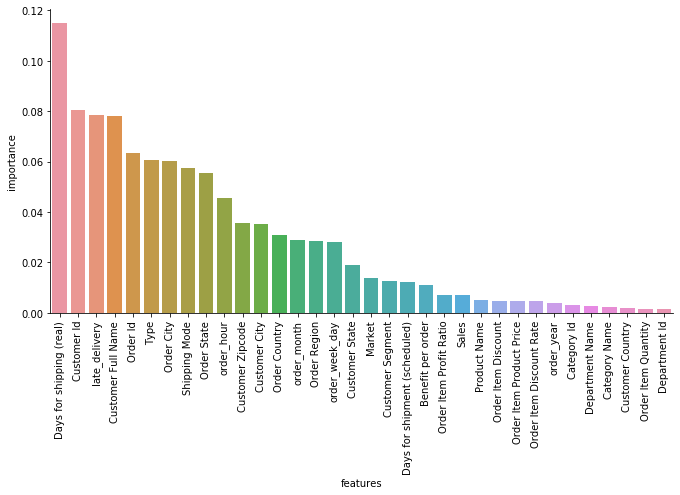

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
feat_importance = feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance', data=feat_importance, kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)

In [85]:
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras.layers.BatchNormalization()

classifier = Sequential()
classifier.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=34))
classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(128, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(32, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(2, activation='relu', kernel_initializer='random_normal'))

classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

classifier.fit(x_fraud_train, y_fraud_train, batch_size=512, epochs=10)

Train on 144408 samples
Epoch 1/10
144408/144408 [==============================] - 9s 62us/sample - loss: 0.1925 - accuracy: 0.9775
Epoch 2/10
144408/144408 [==============================] - 9s 61us/sample - loss: 0.0535 - accuracy: 0.9775
Epoch 3/10
144408/144408 [==============================] - 7s 52us/sample - loss: 0.0511 - accuracy: 0.9775
Epoch 4/10
144408/144408 [==============================] - 7s 51us/sample - loss: 0.0491 - accuracy: 0.9775
Epoch 5/10
144408/144408 [==============================] - 8s 52us/sample - loss: 0.0475 - accuracy: 0.9775
Epoch 6/10
144408/144408 [==============================] - 8s 56us/sample - loss: 0.0458 - accuracy: 0.9775
Epoch 7/10
144408/144408 [==============================] - 8s 58us/sample - loss: 0.0439 - accuracy: 0.9775
Epoch 8/10
144408/144408 [==============================] - 9s 64us/sample - loss: 0.0420 - accuracy: 0.9775
Epoch 9/10
144408/144408 [==============================] - 9s 61us/sample - loss: 0.0388 - accuracy: 0.

In [86]:
train_evaluate = classifier.evaluate(x_fraud_train, y_fraud_train)
test_evaluate = classifier.evaluate(x_fraud_test, y_fraud_test)
print(train_evaluate,test_evaluate)


36103/36103 [==============================] - 2s 59us/sample - loss: 0.0472 - accuracy: 0.9807
[0.03302053336875619, 0.9853471] [0.04724787599127673, 0.98074955]


In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

eclf = VotingClassifier(estimators=[('LR',model_fraud_lr), ('dt',model_fraud_dt),('svc',model_fraud_svc)], voting='soft')
for clf, label in zip([model_fraud_lr, model_fraud_dt, model_fraud_svc, eclf], ['LR','dt','svc','Voting']):
    scores = cross_val_score(clf, x_fraud, y_fraud, cv=5, scoring='accuracy')
    print("Accuracy:%0.2f(+/- %0.2f) [%s]"%(scores.mean(), scores.std(), label))


Accuracy:0.98(+/- 0.00) [LR]
Accuracy:0.97(+/- 0.02) [dt]
Accuracy:0.98(+/- 0.00) [svc]
Accuracy:0.98(+/- 0.00) [Voting]


In [ ]:
eclf = VotingClassifier(estimators=[('LR',model_fraud_lr), ('dt',model_fraud_dt)], voting='soft')
for clf, label in zip([model_fraud_lr, model_fraud_dt, eclf], ['LR','dt','Voting']):
    scores = cross_val_score(clf, x_fraud, y_fraud, cv=5, scoring='accuracy')
    print("Accuracy:%0.2f(+/- %0.2f) [%s]"%(scores.mean(), scores.std(), label))


In [94]:
model_fraud = KNeighborsClassifier(n_neighbors = 1)
model_late = KNeighborsClassifier(n_neighbors = 1)

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: KNeighborsClassifier(n_neighbors=1)
Fraud accuracy: 97.6206963410243%
Fraud recall: 46.015037593984964%
Fraud F1 Score: 41.60435078178109%
Fraud Confusion Matrix:
[[34938   500]
 [  359   306]]
Model used: KNeighborsClassifier(n_neighbors=1)
Late Delivery accuracy: 83.06788909508906%
Late Delivery recall: 85.25964010282776%
Late Delivery F1 Score: 84.43697650143844%
Late Delivery Confusion Matrix:
[[13407  3246]
 [ 2867 16583]]


KNeighborsClassifier(n_neighbors=1)

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model_fraud = LinearDiscriminantAnalysis()
model_late = LinearDiscriminantAnalysis()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: LinearDiscriminantAnalysis()
Fraud accuracy: 97.95030883860068%
Fraud recall: 55.40983606557377%
Fraud F1 Score: 47.740112994350284%
Fraud Confusion Matrix:
[[35025   468]
 [  272   338]]
Model used: LinearDiscriminantAnalysis()
Late Delivery accuracy: 98.16081766058223%
Late Delivery recall: 97.59598668852134%
Late Delivery F1 Score: 98.3384215004254%
Late Delivery Confusion Matrix:
[[15790   180]
 [  484 19649]]


LinearDiscriminantAnalysis()

In [97]:
model_fraud = RandomForestClassifier()
model_late = RandomForestClassifier()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: RandomForestClassifier()
Fraud accuracy: 98.90313824335928%
Fraud recall: 97.89719626168224%
Fraud F1 Score: 67.9092382495948%
Fraud Confusion Matrix:
[[35288   387]
 [    9   419]]
Model used: RandomForestClassifier()
Late Delivery accuracy: 99.11641691826163%
Late Delivery recall: 98.41671629938456%
Late Delivery F1 Score: 99.20204117367486%
Late Delivery Confusion Matrix:
[[15955     0]
 [  319 19829]]


RandomForestClassifier()

In [98]:
import xgboost as xgb
model_fraud = xgb.XGBClassifier()
model_late = xgb.XGBClassifier()

model_stats(model_fraud, x_fraud_train, x_fraud_test, y_fraud_train, y_fraud_test, name='Fraud')
model_stats(model_late, x_late_train, x_late_test, y_late_train, y_late_test, name='Late Delivery')


Model used: XGBClassifier()
Fraud accuracy: 97.88383236850123%
Fraud recall: 60.824742268041234%
Fraud F1 Score: 23.599999999999998%
Fraud Confusion Matrix:
[[35221   688]
 [   76   118]]
Model used: XGBClassifier()
Late Delivery accuracy: 98.81727280281417%
Late Delivery recall: 97.89198262243286%
Late Delivery F1 Score: 98.934763627292%
Late Delivery Confusion Matrix:
[[15847     0]
 [  427 19829]]


XGBClassifier()

In [99]:
accuracy_list

{('Fraud', GaussianNB()): 0.8810625155804227,
 ('Late Delivery', GaussianNB()): 0.5733041575492341,
 ('Fraud', LinearSVC()): 0.9786721325097637,
 ('Late Delivery', LinearSVC()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9919397280004432,
 ('Late Delivery', DecisionTreeClassifier()): 0.9941002132786749,
 ('Fraud', LogisticRegression()): 0.9789491178018447,
 ('Late Delivery', LogisticRegression()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9924936985846051,
 ('Late Delivery', DecisionTreeClassifier()): 0.9942387059247154,
 ('Fraud', LogisticRegression()): 0.9789491178018447,
 ('Late Delivery', LogisticRegression()): 0.9881727280281417,
 ('Fraud', LinearSVC()): 0.9786444339805557,
 ('Late Delivery', LinearSVC()): 0.9881727280281417,
 ('Fraud', DecisionTreeClassifier()): 0.9923552059385646,
 ('Late Delivery', DecisionTreeClassifier()): 0.9939894191618425,
 ('Fraud', KNeighborsClassifier(n_neighbors=1)): 0.9762069634102429,
 ('Late Delivery', KNeighborsCl

# regression

In [100]:
train_data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Region', 'Order State', 'Product Name', 'Shipping Mode',
       'Customer Full Name', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'fraud', 'late_delivery'],
      dtype='object')

In [129]:
x_sales = train_data.loc[:, train_data.columns!='Sales']
y_sales = train_data['Sales']

x_quantity = train_data.loc[:, train_data.columns!='Order Item Quantity']
y_quantity = train_data['Order Item Quantity']

x_sales_train, x_sales_test, y_sales_train, y_sales_test = train_test_split(x_sales, y_sales, test_size=0.2)
x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test = train_test_split(x_quantity, y_quantity, test_size=0.2)



In [130]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
def regression_model_stats(model, x_train, x_test, y_train, y_test, model_name = 'Sales'):
    model = model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Model Used:', model)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print('{} MAE {}'.format(model_name, mae))
    print('{} MSE {}'.format(model_name, mse))
    return mae, mse

In [131]:
y_quantity_test


141966    1
104150    1
170723    1
174167    1
133391    1
         ..
90577     1
106431    4
67211     2
126455    1
115928    1
Name: Order Item Quantity, Length: 36103, dtype: int64

In [145]:
from sklearn.linear_model import LinearRegression
model_sales = LinearRegression()
model_quantity = LinearRegression()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
#regresison_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Model Used: LinearRegression()
Sales MAE 18.363818985760187
Sales MSE 955.3581796835795
Model Used: LinearRegression()
Quantity MAE 0.34284215976339866
Quantity MSE 0.2726316195997662


(0.34284215976339866, 0.2726316195997662)

In [146]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

model_sales = Lasso()
model_quantity = Lasso()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Model Used: Lasso()
Sales MAE 18.699294068035826
Sales MSE 1046.10819925134
Model Used: Lasso()
Quantity MAE 0.3590253909872976
Quantity MSE 0.29372063182285174


(0.3590253909872976, 0.29372063182285174)

In [147]:
model_sales = Ridge()
model_quantity = Ridge()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')



Model Used: Ridge()
Sales MAE 18.3593408330576
Sales MSE 955.372321639914
Model Used: Ridge()
Quantity MAE 0.3428398347477812
Quantity MSE 0.27263235364815225


(0.3428398347477812, 0.27263235364815225)

In [148]:
model_sales = DecisionTreeRegressor()
model_quantity = DecisionTreeRegressor()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')



Model Used: DecisionTreeRegressor()
Sales MAE 1.1487141773573678e-11
Sales MSE 2.862988286772376e-22
Model Used: DecisionTreeRegressor()
Quantity MAE 0.0
Quantity MSE 0.0


(0.0, 0.0)

In [149]:
model_sales = xgb.XGBRegressor()
model_quantity =  xgb.XGBRegressor()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')



[22:33:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Used: XGBRegressor()
Sales MAE 2.4044892131923965
Sales MSE 14.402532970300967
[22:33:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Used: XGBRegressor()
Quantity MAE 0.033920986460598636
Quantity MSE 0.004018564605427493


(0.033920986460598636, 0.004018564605427493)

In [158]:
import lightgbm as lgb
model_sales = lgb.LGBMRegressor()
model_quantity =  lgb.LGBMRegressor()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')



Model Used: LGBMRegressor()
Sales MAE 0.14990485022160727
Sales MSE 6.928017133009103
Model Used: LGBMRegressor()
Quantity MAE 0.0003610774947217421
Quantity MSE 4.558190568819751e-06


(0.0003610774947217421, 4.558190568819751e-06)

In [152]:
model_sales = RandomForestRegressor()
model_quantity =  RandomForestRegressor()

regression_model_stats(model_sales, x_sales_train, x_sales_test, y_sales_train, y_sales_test, model_name='Sales')
regression_model_stats(model_quantity, x_quantity_train, x_quantity_test, y_quantity_train, y_quantity_test, model_name='Quantity')


Model Used: RandomForestRegressor()
Sales MAE 0.000429953122805757
Sales MSE 0.001516381621302889
Model Used: RandomForestRegressor()
Quantity MAE 0.0
Quantity MSE 0.0


(0.0, 0.0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

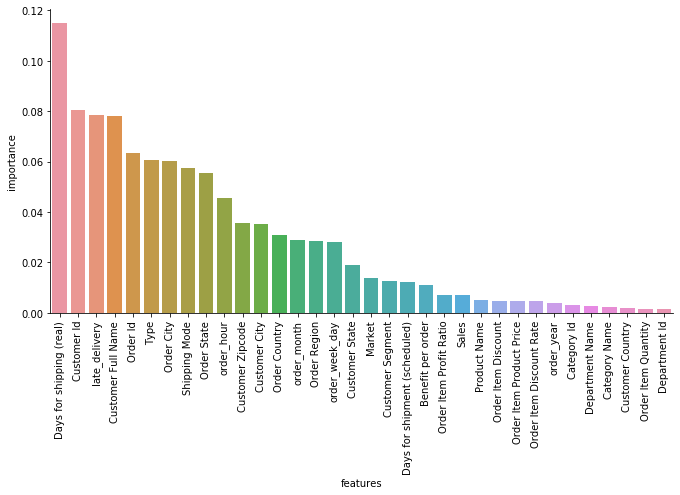

In [153]:
feat_importance = feat_importance.sort_values(by='importance',ascending=False)
sns.catplot(x='features',y='importance', data=feat_importance, kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)

#5 可解释性

从重要性因子图中可以看出运输日期在分类问题中对是否会欺骗能起到重要的可解释作用，其次可解释的因子为顾客的id、是否延误送达。即顾客的身份以及是否延误的行为习惯对结果有重要的解释作用。

# Action2	

"一个农民承包了6块耕地共300亩，准备播种小麦，玉米，水果和蔬菜四种农产品，已知各种农产品的计划播种面积、每块土地种植不同农产品的单产收益
如何进行合理安排，使得总收益最大

可以使用pulp/ortools工具"			

"1、能使用pulp或ortools工具（10points）

2、结果正确（10points）"

In [1]:
import pulp
import numpy as np
from pprint import pprint

# 定义运输问题
def transportation_problem(costs, x_max, y_max):
    row = len(costs)
    col = len(costs[0])
    print(f'row:{row} col:{col}')
    # 定义初始问题
    prob = pulp.LpProblem('Transportation', sense=pulp.LpMaximize)
    # 定义相关变量
    var = [[pulp.LpVariable(f'x{i}{j}', lowBound=0, cat=pulp.LpInteger) for j in range(col)] for i in range(row)]
    # 递归展开列表
    flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
    print('var=', var)
    print('flatten=', flatten)
    print('var[1]', var[1])
    # 定义目标函数 （单价* {ij}运量）
    prob += pulp.lpDot(flatten(var), costs.flatten())
    # 定义约束条件
    for i in range(row):
        prob += pulp.lpSum(var[i]) <= x_max[i]
    for j in range(col):
        prob += pulp.lpSum([var[i][j] for i in range(row)]) <= y_max[j]

    prob.solve()
    result = {'objective':pulp.value(prob.objective), \
              'var': [[pulp.value(var[i][j]) for j in range(col)] for i in range(row)]}
    return result

# 解决具体问题
costs = np.array([[500, 550, 630, 1000, 800, 700],
                      [800, 700, 600, 950, 900, 930],
                      [1000, 960, 840, 650, 600, 700],
                      [1200, 1040, 980, 860, 880, 780]])
# 工厂最大产量
max_plant = [76, 88, 96, 40]
# 销售地需求量
max_cultivation = [42, 56, 44, 39, 60, 59]
# 使用线性规划
result = transportation_problem(costs, max_plant, max_cultivation)

print(f'最大值为{result["objective"]}')
print('各变量的取值为：')
pprint(result['var'])

row:4 col:6
var= [[x00, x01, x02, x03, x04, x05], [x10, x11, x12, x13, x14, x15], [x20, x21, x22, x23, x24, x25], [x30, x31, x32, x33, x34, x35]]
flatten= <function transportation_problem.<locals>.<lambda> at 0x10b2c9048>
var[1] [x10, x11, x12, x13, x14, x15]


PulpSolverError: Pulp: Error while trying to execute, use msg=True for more detailscbc

In [5]:
import pulp
#目标函数的系数
z = np.array([2, 3, 1])
#约束
a = np.array([[1, 4, 2], [3, 2, 0]])
b = np.array([8, 6])
#确定最大化最小化问题，最大化只要把Min改成Max即可
m = pulp.LpProblem(sense=pulp.LpMinimize)

#定义三个变量放到列表中
x = [pulp.LpVariable(f'x{i}', lowBound=0) for i in [1,2,3]]
#定义目标函数，lpDot可以将两个列表的对应位相乘再加和
#相当于z[0]*x[0]+z[1]*x[0]+z[2]*x[2]
m += pulp.lpDot(z, x)
#设置约束条件
for i in range(len(a)):
    m += (pulp.lpDot(a[i], x) >= b[i])
print(m)
m.solve() #求解
#输出结果
print(f'优化结果：{pulp.value(m.objective)}')
print(f'参数取值：{[pulp.value(var) for var in x]}')

NoName:
MINIMIZE
2*x1 + 3*x2 + 1*x3 + 0
SUBJECT TO
_C1: x1 + 4 x2 + 2 x3 >= 8

_C2: 3 x1 + 2 x2 >= 6

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous



PulpSolverError: Pulp: Error while trying to execute, use msg=True for more detailscbc